# Importing Libraries

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# Reading raw data and picking the relevant channels

In [2]:
raw = mne.io.read_raw_ctf('MNI0080_MEGs0004_resting_20150316_01.ds', preload=True)

ds directory : MNI0080_MEGs0004_resting_20150316_01.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -0.77   72.12    0.00 mm <->   -0.77   72.12    0.00 mm (orig :  -51.26   51.70 -252.21 mm) diff =    0.000 mm
       0.77  -72.12    0.00 mm <->    0.77  -72.12    0.00 mm (orig :   54.38  -46.51 -251.59 mm) diff =    0.000 mm
     106.46    0.00    0.00 mm <->  106.46   -0.00    0.00 mm (orig :   73.35   78.28 -230.64 mm) diff =    0.000 mm
    Coordinate transformations established.
    Reading digitizer points from ['MNI0080_MEGs0004_resting_20150316_01.ds/MNI0080_MEGs0004_20150316_01.pos']...
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 3 EEG channels from channel info
    3 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for MNI0080_MEGs0004_resting_20150316_01.ds/MNI0080_MEGs0004

In [3]:
raw.pick_channels(raw.ch_names[298:301])

<RawCTF  |  MNI0080_MEGs0004_resting_20150316_01.meg4, n_channels x n_times : 3 x 777600 (324.0 sec), ~18.0 MB, data loaded>

# Checking what the actual data looks like

In [32]:
raw._data

array([[ -3.04870071e-11,  -3.05469732e-11,  -3.06148907e-11, ...,
         -3.10144444e-11,  -3.10538697e-11,  -3.10151070e-11],
       [ -4.48623855e-11,  -4.49949368e-11,  -4.51005841e-11, ...,
         -4.50907412e-11,  -4.51570168e-11,  -4.49877186e-11],
       [ -3.61475586e-12,  -3.75352330e-12,  -3.82936924e-12, ...,
         -3.68720063e-12,  -3.68686051e-12,  -3.55387505e-12]])

In [33]:
X = raw._data.T #Transposing the data to use it in the ICA

In [34]:
X # Printing the transposed data

array([[ -3.04870071e-11,  -4.48623855e-11,  -3.61475586e-12],
       [ -3.05469732e-11,  -4.49949368e-11,  -3.75352330e-12],
       [ -3.06148907e-11,  -4.51005841e-11,  -3.82936924e-12],
       ..., 
       [ -3.10144444e-11,  -4.50907412e-11,  -3.68720063e-12],
       [ -3.10538697e-11,  -4.51570168e-11,  -3.68686051e-12],
       [ -3.10151070e-11,  -4.49877186e-11,  -3.55387505e-12]])

# Plotting Raw Data

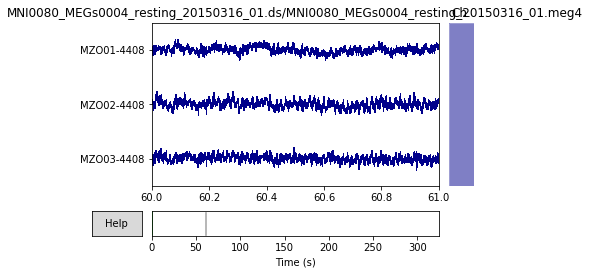

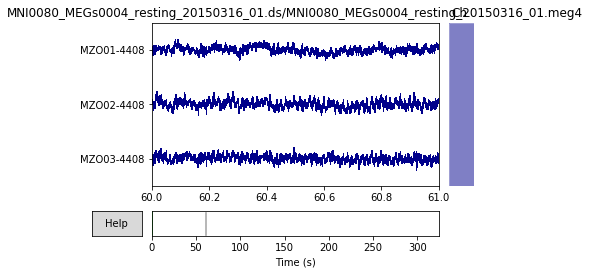

In [29]:
raw.plot(n_channels=3, duration=1, start=60)

# Running FastICA and PCA on the transposed data

In [44]:
ica = FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_

In [41]:
pca = PCA()
H = pca.fit_transform(X)

# Plotting the ICA

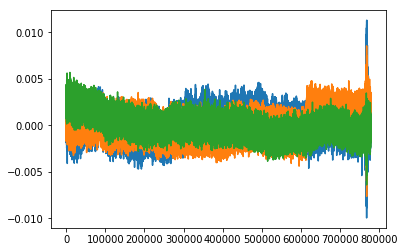

In [45]:
plt.figure()
plt.plot(S_)
plt.show()